In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score



# DATASET

In [3]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

We consider the following variables will be dropped for our model training process:
PassengerId, Ticket, Name: objects for individuals
            
Cabin : contains too many NaN values and wasn't described well



In [8]:
taitanic_train = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',       'Parch', 'Fare', 'Embarked']] 



In [9]:
titanic_train = df.dropna(axis = 0)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Now let's convert the category datas into dummies.



In [10]:
cat_variables = ['Pclass', 'Sex','Embarked']

In [11]:
titanic_train_dm = pd.get_dummies(data = titanic_train,
                         prefix = cat_variables,
                         columns = cat_variables)
titanic_train_dm.rename(columns = {'Sex_male':'Sex'}, inplace = True) 
titanic_train_dm.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex,Embarked_C,Embarked_Q,Embarked_S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,True,False,False,False,True
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,True,False,False,False,True,False,False,True
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,False,False,True,True,False,False,False,True
11,12,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,True,False,False,True,False,False,False,True


In [12]:
titanic_train_dm = titanic_train_dm.drop(['Sex_female'], axis=1)

In [13]:
titanic_train_dm.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Now we can separate the variables into X and y, then we will immedietly take a look their shapes and description data.



In [14]:
X = titanic_train_dm[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]
y = titanic_train_dm[['Survived']]
print(f'The shape of X_train is: {X.shape}')
print(f'The shape of y_train is: {y.shape}')


The shape of X_train is: (183, 11)
The shape of y_train is: (183, 1)


In [15]:
X.describe()

,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000
mean,35.674426,0.464481,0.475410,78.682469
std,15.643866,0.644159,0.754617,76.347843
min,0.920000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,29.700000
50%,36.000000,0.000000,0.000000,57.000000
75%,47.500000,1.000000,1.000000,90.000000
max,80.000000,3.000000,4.000000,512.329200


# #EDA

NOW TAKE A LOOK AT EACH VARRIBLE

In [16]:
Age = titanic_train[['Age','Survived']]
Age.describe()

,Age,Survived
count,183.000000,183.000000
mean,35.674426,0.672131
std,15.643866,0.470725
min,0.920000,0.000000
25%,24.000000,0.000000
50%,36.000000,1.000000
75%,47.500000,1.000000
max,80.000000,1.000000


<Axes: xlabel='Age', ylabel='Survived'>

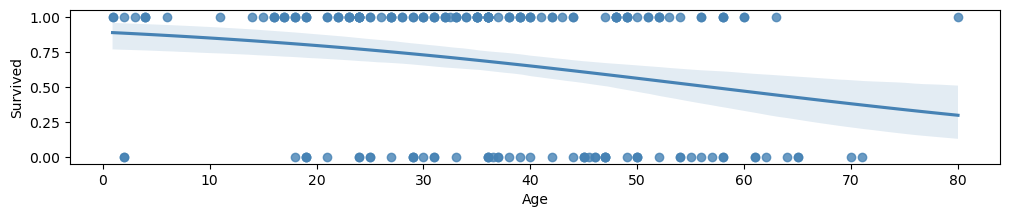

In [17]:
fig, axes = plt.subplots(figsize=(12,2))
sns.regplot(x = "Age",y = "Survived", data=titanic_train, color = 'steelblue', logistic=True)

In [18]:
Age_Survived = Age[Age["Survived"] == 1]
Age_Deceased = Age[Age["Survived"] == 0]

In [19]:
bins_age = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_survived = Age_Survived['Age'].value_counts(bins=bins_age, sort=False) 
age_deceased = Age_Deceased['Age'].value_counts(bins=bins_age, sort=False) 
print(f'The numbers of survivors in different ranges of age: \n{age_survived}')

The numbers of survivors in different ranges of age: 
(-0.001, 10.0]     8
(10.0, 20.0]      15
(20.0, 30.0]      30
(30.0, 40.0]      37
(40.0, 50.0]      17
(50.0, 60.0]      14
(60.0, 70.0]       1
(70.0, 80.0]       1
Name: count, dtype: int64


In [20]:
print(f'The numbers of deathes in different ranges of age: \n{age_deceased}')

The numbers of deathes in different ranges of age: 
(-0.001, 10.0]     2
(10.0, 20.0]       4
(20.0, 30.0]      10
(30.0, 40.0]      12
(40.0, 50.0]      16
(50.0, 60.0]       8
(60.0, 70.0]       7
(70.0, 80.0]       1
Name: count, dtype: int64


ALL FEATURE ARE EITHER INT OR FLOAT DATA TYPE

# checking for missing values

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# heatmap

<Axes: >

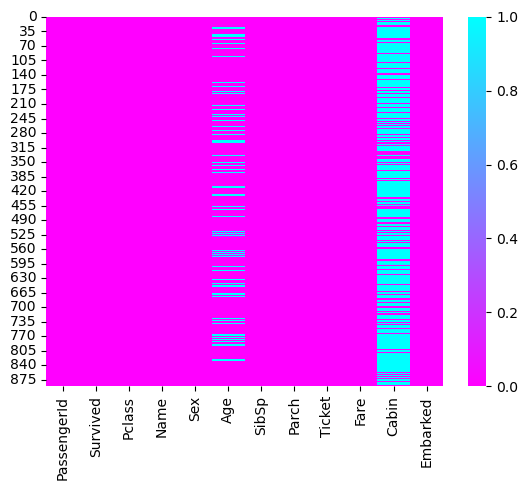

In [22]:
sns.heatmap(df.isnull() , cmap='cool_r' )

In [23]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50  

# sub plot

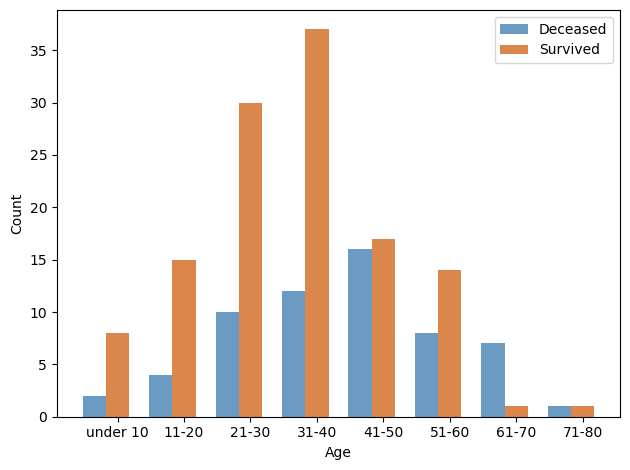

In [24]:
n_groups = 8

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, age_deceased, bar_width,
alpha=opacity,
color='steelblue',
label='Deceased')

rects2 = plt.bar(index  + bar_width, age_survived, bar_width,
alpha=opacity,
color='chocolate',
label='Survived')

plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(index + bar_width, ( 'under 10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'))
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
print("The percentage of survivors who were between the ages 0-10 was:", str(round(38/(38+26) * 100, 2)) + '%')
print("The percentage of survivors who were between the ages 11-20 was:", str(round(44/(44+71) * 100, 2)) + '%')
print("The percentage of survivors who were between the ages 21-30 was:", str(round(84/(84+146) * 100, 2)) + '%')
print("The percentage of survivors who were between the ages 31-40 was:", str(round(68/(68+86) * 100, 2)) + '%')
print("The percentage of survivors who were between the ages 41-50 was:", str(round(33/(33+53) * 100, 2)) + '%')
print("The percentage of survivors who were between the ages 51-60 was:", str(round(17/(17+25) * 100, 2)) + '%')
print("The percentage of survivors who were between the ages 61-70 was:", str(round(3/(3+13) * 100, 2)) + '%')
print("The percentage of survivors who were between the ages 71-80 was:", str(round(1/(1+4) * 100, 2)) + '%')

The percentage of survivors who were between the ages 0-10 was: 59.38%
The percentage of survivors who were between the ages 11-20 was: 38.26%
The percentage of survivors who were between the ages 21-30 was: 36.52%
The percentage of survivors who were between the ages 31-40 was: 44.16%
The percentage of survivors who were between the ages 41-50 was: 38.37%
The percentage of survivors who were between the ages 51-60 was: 40.48%
The percentage of survivors who were between the ages 61-70 was: 18.75%
The percentage of survivors who were between the ages 71-80 was: 20.0%


by cheking the numbers and the plot, we can see the trends as following:

The passengers who were under 10 years old had the highest chance of survival.
The passengers who were between 11-60 years old had a similar chance of survival, which was around 40%.
The passengers who were over 61 years old had the least chance of survival.
The passengers who were between 21-30 had the highest amount, but the rate of survival was just around 37%.

# 2. SibSp: # of siblings / spouses aboard the Titanic

In [26]:
SibSp = titanic_train[['SibSp']]
SibSp.describe()

,SibSp
count,183.000000
mean,0.464481
std,0.644159
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

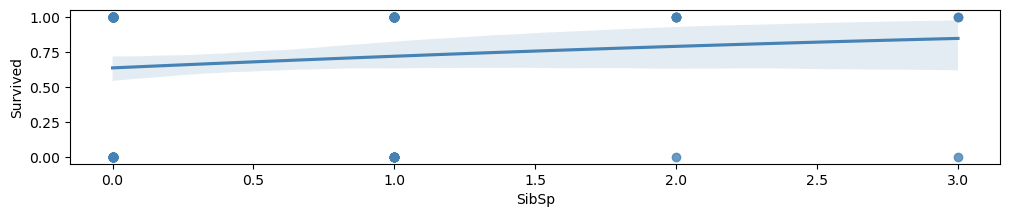

In [27]:
fig, axes = plt.subplots(figsize=(12,2))
sns.regplot(x = "SibSp",y = "Survived", data=titanic_train, color = 'steelblue', logistic=True)

# COUNTPLOT

AttributeError: 'numpy.int64' object has no attribute 'startswith'

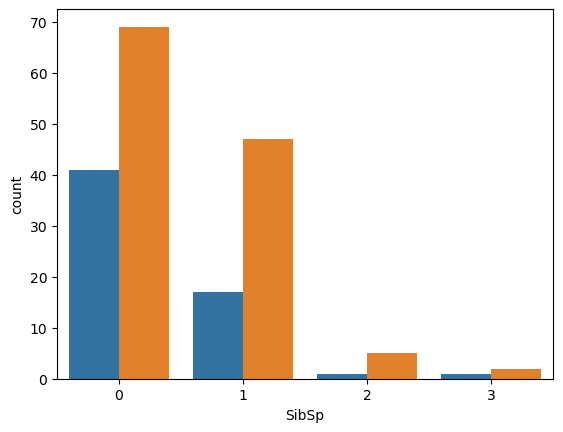

In [28]:
sns.countplot(data=titanic_train,x="SibSp", hue="Survived")

Great, it's much more clear now!



Let's do some calculations before we get the results:



In [29]:
SibSp.max()

SibSp    3
dtype: int64

In [30]:
Male_Survived = len(titanic_train.loc[(titanic_train['Sex'] == 'male') & (titanic_train['Survived'] == 1)])
Male_Total = len(titanic_train[titanic_train["Sex"] == 'male'] )
Male_per = (Male_Survived / Male_Total) * 100
print(f"The percentage of male survivors was: {Male_per:.2f}%")

Female_Survived = len(titanic_train.loc[(titanic_train['Sex'] == 'female') & (titanic_train['Survived'] == 1)])
Female_Total = len(titanic_train[titanic_train["Sex"] == 'female'] )
Female_per = (Female_Survived / Female_Total) * 100
print(f"The percentage of female survivors was: {Female_per:.2f}%")

The percentage of male survivors was: 43.16%
The percentage of female survivors was: 93.18%


# sex:

In [31]:
Sex = titanic_train_dm[['Sex','Survived']]
Sex.describe()

,Survived
count,183.000000
mean,0.672131
std,0.470725
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


AttributeError: 'numpy.int64' object has no attribute 'startswith'

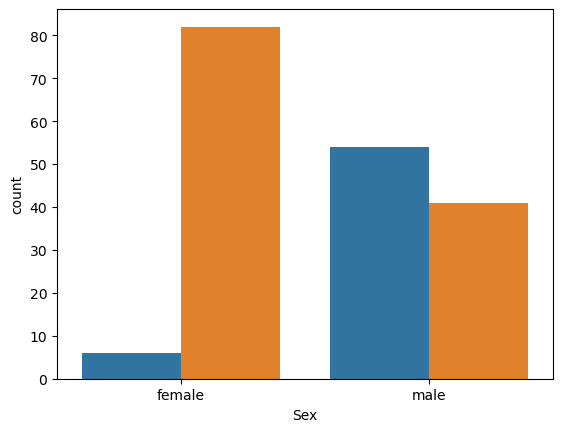

In [32]:
sns.countplot(data=titanic_train, x="Sex", hue="Survived")

8. Embarked: Port of Embarkation S = Southampton, C = Cherbourg, Q = Queenstown



AttributeError: 'numpy.int64' object has no attribute 'startswith'

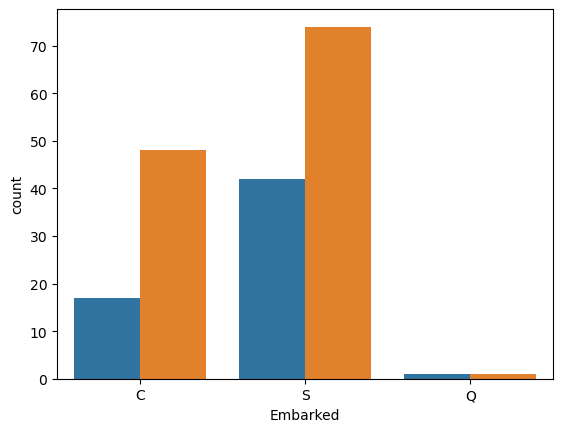

In [33]:
sns.countplot(data=titanic_train, x="Embarked", hue="Survived")


In [34]:
S_Survived = len(titanic_train.loc[(titanic_train['Embarked'] == 'S') & (titanic_train['Survived'] == 1)])
S_Total = len(titanic_train[titanic_train["Embarked"] == 'S'] )
S_per = (S_Survived / S_Total) * 100
print(f"The percentage of survivors who were embarked at the port of Southampton was: {S_per:.2f}%")

C_Survived = len(titanic_train.loc[(titanic_train['Embarked'] == 'C') & (titanic_train['Survived'] == 1)])
C_Total = len(titanic_train[titanic_train["Embarked"] == 'C'] )
C_per = (C_Survived / C_Total) * 100
print(f"The percentage of survivors who were embarked at the port of Cherbourg was: {C_per:.2f}%")

Q_Survived = len(titanic_train.loc[(titanic_train['Embarked'] == 'Q') & (titanic_train['Survived'] == 1)])
Q_Total = len(titanic_train[titanic_train["Embarked"] == 'Q'] )
Q_per = (Q_Survived / Q_Total) * 100
print(f"The percentage of survivors who were embarked at the port of Queenstown was: {Q_per:.2f}%")

The percentage of survivors who were embarked at the port of Southampton was: 63.79%
The percentage of survivors who were embarked at the port of Cherbourg was: 73.85%
The percentage of survivors who were embarked at the port of Queenstown was: 50.00%


The passengers who were embarked at the port of Cherbourg had the highest percentage of survival, Southampton was the 2nd highest, Queenstown was the lowest.
In addition, Southampthon had the largest numbers of passengers.

That's all for our EDA section, let's go to the next process - prediction!

# Prediction



Predict if the passengers in the text set will survive or not, using the logistic regression model.

As I already made the variables into X and y, I can now straightly go into the next steps.

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2) # set default random state
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(146, 11) (37, 11) (146, 1) (37, 1)


# LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression

lr_train = LogisticRegression()
lr_train.fit(X_train, y_train)

w = lr_train.coef_
b = lr_train.intercept_

print("The w are ", w)
print("The b is ", b)
print("w shape is: ", w.shape)
print("b shape is: ", b.shape)

The w are  [[-4.10528191e-02  3.21155631e-01 -5.52587675e-01  2.01571776e-03
   2.80052484e-01  1.87763848e-01 -4.19665811e-01 -2.19901091e+00
   2.17890872e-01  1.07594050e-01 -2.77334401e-01]]
The b is  [3.62412738]
w shape is:  (1, 11)
b shape is:  (1,)


In [38]:
y_pred = lr_train.predict(X_val)

print(confusion_matrix(y_val, y_pred))

[[ 7  9]
 [ 2 19]]


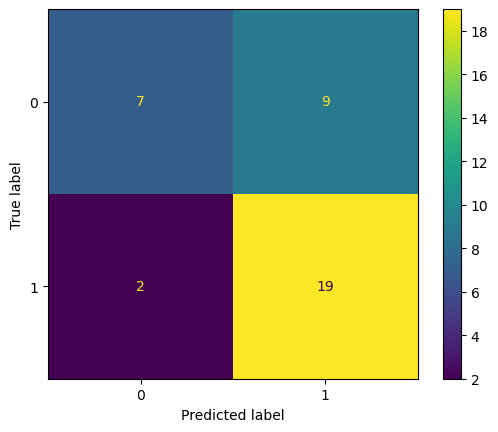

In [39]:
cm = confusion_matrix(y_val, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [40]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56        16
           1       0.68      0.90      0.78        21

    accuracy                           0.70        37
   macro avg       0.73      0.67      0.67        37
weighted avg       0.72      0.70      0.68        37



In [41]:
print('The accuracy score is :', accuracy_score(y_val, y_pred))

The accuracy score is : 0.7027027027027027


It is good enough for now, let's apply it into our text dataset.


In [42]:
titanic_test = df[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


We make the category columns to dummies.



In [43]:
titanic_test_dm = pd.get_dummies(data = titanic_test, prefix = cat_variables, columns = cat_variables)
titanic_test_dm.rename(columns = {'Sex_male':'Sex'}, inplace = True) 
titanic_test_dm.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


In [44]:
titanic_test_dm = titanic_test_dm.drop(['Sex_female'], axis=1)
titanic_test_dm.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [45]:
titanic_test_dm.isna().sum()

Age           177
SibSp           0
Parch           0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex             0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

Oops! The test set contains NaN values, as LogisticRegression does not accept missing values encoded as NaN natively. In order to handle this issue, we will go back to the training process again.

Let's drop the NaN data for X_test first.



In [46]:
X_test = titanic_test_dm.dropna(axis = 0)
y_test = lr_train.predict(X_test)

print("Prediction on training set:", y_test)

Prediction on training set: [1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1

Now, let's work on the NaN data. We would like to create a model that doesn't contain Age and Fare which contain NaN values in the test set. The new model will be used just for passengers who had NaN values.

In [47]:
X_nan = titanic_train_dm[['SibSp', 'Parch', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]
y_nan = titanic_train_dm[['Survived']]
print(f'The shape of X_train is: {X_nan.shape}')
print(f'The shape of y_train is: {y_nan.shape}')

The shape of X_train is: (183, 9)
The shape of y_train is: (183, 1)


In [48]:
X_train_nan, X_val_nan, y_train_nan, y_val_nan = train_test_split(X_nan, y_nan, test_size = 0.2) # Everything keep the same as the original model
print(X_train_nan.shape, X_val_nan.shape, y_train_nan.shape, y_val_nan.shape)

(146, 9) (37, 9) (146, 1) (37, 1)


In [49]:
lr_train_nan = LogisticRegression()
lr_train_nan.fit(X_train_nan, y_train_nan)

w_nan = lr_train_nan.coef_
b_nan = lr_train_nan.intercept_

print("The w_nan are ", w_nan)
print("The b_nan is ", b_nan)
print("w_nan shape is: ", w_nan.shape)
print("b_nan shape is: ", b_nan.shape)

The w_nan are  [[ 0.32539965 -0.16702511 -0.29821972  0.62367665 -0.32532038 -2.65061654
   0.39231315 -0.35377437 -0.03840222]]
The b_nan is  [2.4815882]
w_nan shape is:  (1, 9)
b_nan shape is:  (1,)


#ConfusionMatrix

In [50]:
y_pred_nan = lr_train_nan.predict(X_val_nan)

print(confusion_matrix(y_val_nan, y_pred_nan))
print('The accuracy score for NaN set is :', accuracy_score(y_val_nan, y_pred_nan))
print(classification_report(y_val_nan, y_pred_nan))

[[ 4  5]
 [ 6 22]]
The accuracy score for NaN set is : 0.7027027027027027
              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.81      0.79      0.80        28

    accuracy                           0.70        37
   macro avg       0.61      0.62      0.61        37
weighted avg       0.71      0.70      0.71        37



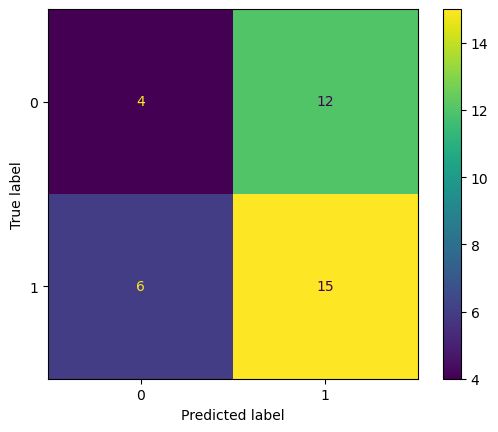

In [51]:
cm_nan = confusion_matrix(y_val, y_pred_nan)

ConfusionMatrixDisplay(confusion_matrix=cm_nan).plot();

In [52]:
X_test_nan_f = titanic_test_dm[titanic_test_dm['Fare'].isna()]  # Treat 2 columns as different situations
X_test_nan_a = titanic_test_dm[titanic_test_dm['Age'].isna()]   
X_test_nan = [X_test_nan_f, X_test_nan_a]                       # needs to concat
X_test_nan = pd.concat(X_test_nan)
X_test_nan.shape

(177, 11)

In [53]:
X_test_nan = X_test_nan[['SibSp', 'Parch',  'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]# then drop the `age` and `fare`
y_test_nan = lr_train_nan.predict(X_test_nan)

print("Prediction on training set with NaN:", y_test_nan)

Prediction on training set with NaN: [0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1
 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1]


There we go! We created two separate datasets for different situations!

Now it's time to apply the prediction values into our dataset!

In [54]:
X_test['Survived'] = y_test
X_test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,1,0,7.2500,False,False,True,True,False,False,True,1
1,38.0,1,0,71.2833,True,False,False,False,True,False,False,1
2,26.0,0,0,7.9250,False,False,True,False,False,False,True,1
3,35.0,1,0,53.1000,True,False,False,False,False,False,True,1
4,35.0,0,0,8.0500,False,False,True,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,False,False,True,False,False,True,False,0
886,27.0,0,0,13.0000,False,True,False,True,False,False,True,1
887,19.0,0,0,30.0000,True,False,False,False,False,False,True,1
889,26.0,0,0,30.0000,True,False,False,True,True,False,False,1


In [55]:
X_test_nan['Survived'] = y_test_nan
X_test_nan

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked_C,Embarked_Q,Embarked_S,Survived
5,0,0,False,False,True,True,False,True,False,0
17,0,0,False,True,False,True,False,False,True,1
19,0,0,False,False,True,False,True,False,False,1
26,0,0,False,False,True,True,True,False,False,0
28,0,0,False,False,True,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...
859,0,0,False,False,True,True,True,False,False,0
863,8,2,False,False,True,False,False,False,True,1
868,0,0,False,False,True,True,False,False,True,0
878,0,0,False,False,True,True,False,False,True,0


In [56]:
output = [X_test, X_test_nan]
output = pd.concat(output)
output

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,1,0,7.2500,False,False,True,True,False,False,True,1
1,38.0,1,0,71.2833,True,False,False,False,True,False,False,1
2,26.0,0,0,7.9250,False,False,True,False,False,False,True,1
3,35.0,1,0,53.1000,True,False,False,False,False,False,True,1
4,35.0,0,0,8.0500,False,False,True,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,NaN,0,0,NaN,False,False,True,True,True,False,False,0
863,NaN,8,2,NaN,False,False,True,False,False,False,True,1
868,NaN,0,0,NaN,False,False,True,True,False,False,True,0
878,NaN,0,0,NaN,False,False,True,True,False,False,True,0


#  
    
    
    
    #This will be our submission file.



In [57]:
submission = pd.DataFrame()

In [58]:
submission[[ 'PassengerId']] = df[[ 'PassengerId']]
submission[['Survived']] = output[[ 'Survived']]
submission

,PassengerId,Survived
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,1
887,888,1
888,889,1
889,890,1


# Conclusion


So, it's time to answers the question: “what sorts of people were more likely to survive?”


Age: Passengers who were under 10 years ago would most likely survive. Or a worse case, your age needs to be under 60 years old. If you have a chance, try not to grow up or try to grow up faster, so you can be out of range of age between 21-30, it is a dangerous group too.
SibSp: Passengers who were aboard with 1-2 siblings or spouses got the most chance of survival. Try not to be aboard with too many siblings or too many spouses..well, it shouldn't happen anyway.
Parch: Passengers who were aboard with 1-3 parents or children got a very high rate of survival.
Fare: Passengers who had fare between 101-300 had a pretty good chance of survival. Or you can try to be very rich so you can buy a ticket up to $600 , so you will get a 100 percent chance of survival!
Pclass: Same here, try to be rich, the passengers who were in 1st class had a big chance of survival.
Sex: Female had much more chance of survival than the male.
Embarked: The passengers who were embarked at the port of Cherbourg had the highest percentage of survival. It is fair if you can drive or walk, or run, any way to the port of Cherbourge then aboard over there, so you will have more chance of survival.